<a href="https://colab.research.google.com/github/pjs990301/New_York_City_Airbnb_Open_Data/blob/main/New_York_City_Airbnb_Open_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<h1><b>New York City Airbnb Open Data: Data Analysis</b></h1>**


---



## <b>The purpose of progressing</b>
The above data analysis was carried out as part of the Data Science Team project.


---



**We are going to analyze the data by conducting the End-to-End Process that we learned in data science.**
## <b>End-to-End Process</b>

1.   Objective Setting  
2.   Data Curation
3.   Data Inspection
4.   Data PreProcessing
5.   Data Analysis
6.   Evaluation
7.   Deployment


---




###<b> 1. Objective Setting & 2. Data Curation</b>## 

####**Background and Objective**

According to Investopedia, Airbnb is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in specific locales. 

As a person who loves to travel, Airbnb has been our go-to platform to search for lodging, vacation rentals, and tourism activities. Aside from it being a much cheaper alternative than hotels, the convenience Airbnb provides is excellent, thanks to their own website/mobile application. 

With that in mind, We want to create a Data Visualization on the New York City Airbnb Dataset to understand the following:<br><br>

1.   Distribution of listings — (a) location, (b) room type
2.   Differences in the (a) price, (b) minimum nights, (c) number of reviews, and (d) availability per neighbourhood group and room type
3. Relationship between the dataset features
<br><br>

####**Context**

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.<br><br>


####**Content**

This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.<br><br>

####**Acknowledgements**

This public dataset is part of Airbnb, and the original source can be found on this website.<br><br>

####<b>Testing</b>  
-- 가설검증 진행 X <br>
Hypothesis Testing will also be conducted to determine whether the observations that will arise in the Exploratory Data Analysis are statistically significant
<br><br>

**Ultimately, We will try to answer the problem statement and give a recommendation on what type of property to invest in and where**

---



### <b>3. Data Inspection & 4. Data PreProcessing</b>

#### **Specification**

   1.   <b>Importing Libraries</b><br>

   2.   <b>Loading the dataset</b> : <br>
    *   The shape of the dataset
    *   All the columns names of the dataset
    *   The datatypes of the dataset
    *   The dataset
    *   The statistical Analysis of Data

   3.   <b>Data Cleaning : </b><br>
    *   Check for the null values in each column
    *   Delete unnecessary columns
    *   Replace the 'reviews per month' by zero
    *   Remove the NaN values from the dataset

   4.   <b>Data Visualization : </b><br>
    *   Correlation between different variables
    *   Neighbourhood Group
    *   Neighbourhood
    *   Room Type
    *   Relation between neighbourgroup and Availability of Room
    *   Map of Neighbourhood Group
    *   Map of Room type
    *   Map of Availability of Room
    
   5.   <b>Data Exploration : </b><br>
    *   Find out Top 10 host
    *   Find out more about our neighbourhoods
    *   Find out top 10 neighbourhoods
    *   Scatterplot representation of availability_365 and price through latitude and longitude

















##### <h3><b>Importing Libraries

자체 제작 모듈<br>
https://test.pypi.org/project/NewYorkAirbnbOpenData/ <br>
https://github.com/pjs990301/New_York_City_Airbnb_Open_Data:

In [ ]:
pip install -i https://test.pypi.org/simple/ NewYorkAirbnbOpenData==0.1.17

Looking in indexes: https://test.pypi.org/simple/, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import warnings
import NewYorkAirbnbOpenData as nyc
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

warnings.filterwarnings('ignore')

# Change numeric expression
pd.options.display.float_format = '{:.2f}'.format

##### <h3><b>Loading Dataset

In [ ]:
# Using pandas library and 'read_csv' function to read
airbnb = pd.read_csv('https://raw.githubusercontent.com/pjs990301/New_York_City_Airbnb_Open_Data/main/AB_NYC_2019.csv')

# Examing head of csv file
airbnb.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,NaN,NaN,1,365


Print the Shape of the dataset


In [ ]:
# Checking dataset shape
airbnb.shape

(48895, 16)

Print all the Columns names of the dataset

In [ ]:
# Checking column names for datasets
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Print the Datatypes of the dataset


In [ ]:
# Checking type of every column in the dataset
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
# Checking the overall information of the dataset
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Print the Dataset

In [ ]:
# Printing dataset
airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.68,-73.95,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70,-73.93,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81,-73.95,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.76,-73.99,Shared room,55,1,0,NaN,NaN,6,2


Print the Statistical Analysis of Data

In [ ]:
# Printing Statistical Analysis of Data
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00,38843.00,48895.00,48895.00
mean,19017143.24,67620010.65,40.73,-73.95,152.72,7.03,23.27,1.37,7.14,112.78
std,10983108.39,78610967.03,0.05,0.05,240.15,20.51,44.55,1.68,32.95,131.62
min,2539.00,2438.00,40.50,-74.24,0.00,1.00,0.00,0.01,1.00,0.00
25%,9471945.00,7822033.00,40.69,-73.98,69.00,1.00,1.00,0.19,1.00,0.00
50%,19677284.00,30793816.00,40.72,-73.96,106.00,3.00,5.00,0.72,1.00,45.00
75%,29152178.50,107434423.00,40.76,-73.94,175.00,5.00,24.00,2.02,2.00,227.00
max,36487245.00,274321313.00,40.91,-73.71,10000.00,1250.00,629.00,58.50,327.00,365.00


##### <h3><b>Data Cleaning</h3></b>

Check for the null values in each column

In [ ]:
# Looking to find out first what columns have null values
# Using 'sum' function will show us how many nulls are found in each column in dataset
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Drop unnecessary columns

In [ ]:
# Dropping columns that are not significant or could be unethical to use for our future data exploration and predictions
airbnb.drop(['name','id','host_name','last_review'], axis=1, inplace=True)
#Examing the changes
airbnb.isnull().sum()

host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Replace the 'reviews per month' by zero

In [ ]:
# Replacing all NaN values in 'reviews_per_month' with 0
airbnb.fillna({'reviews_per_month':0}, inplace=True)

# Examing changes
airbnb.reviews_per_month.isnull().sum()

0

Remove the NaN values from the dataset

In [ ]:
airbnb.dropna(how='any',inplace=True)
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(6), object(

##### <h3><b>Data Visualization</h3></b>

Plot Correlation between different variables

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

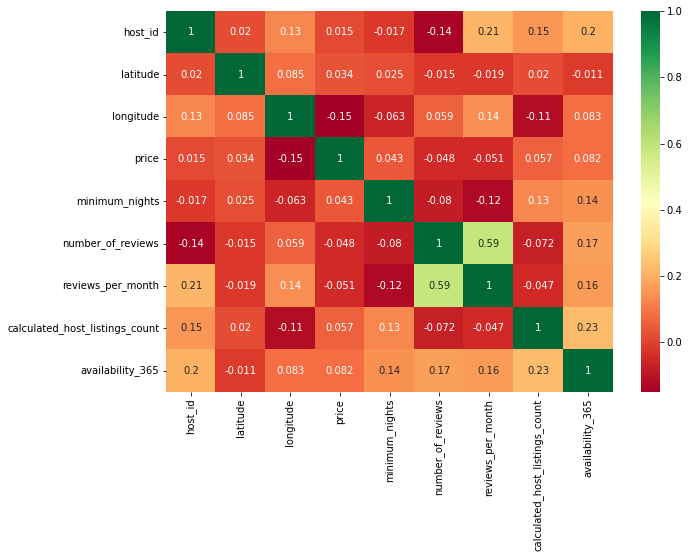

In [ ]:
corr = airbnb.corr()
corr_feature = corr.columns
plt.figure(figsize=(10,7))
sns.heatmap(corr[corr_feature], annot=True,cmap="RdYlGn")
airbnb.columns

Plot Neighbourhood Group

In [ ]:
airbnb['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

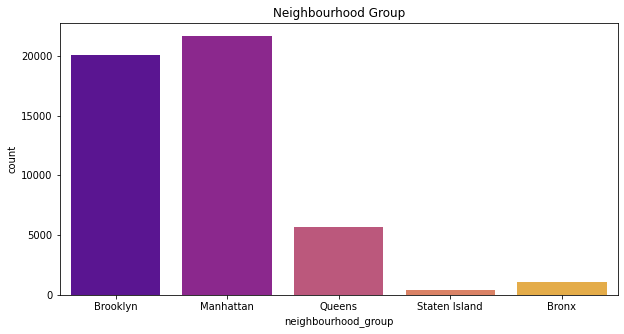

In [ ]:
sns.countplot(airbnb['neighbourhood_group'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.title('Neighbourhood Group')
plt.show()

Plot Neighbourhood


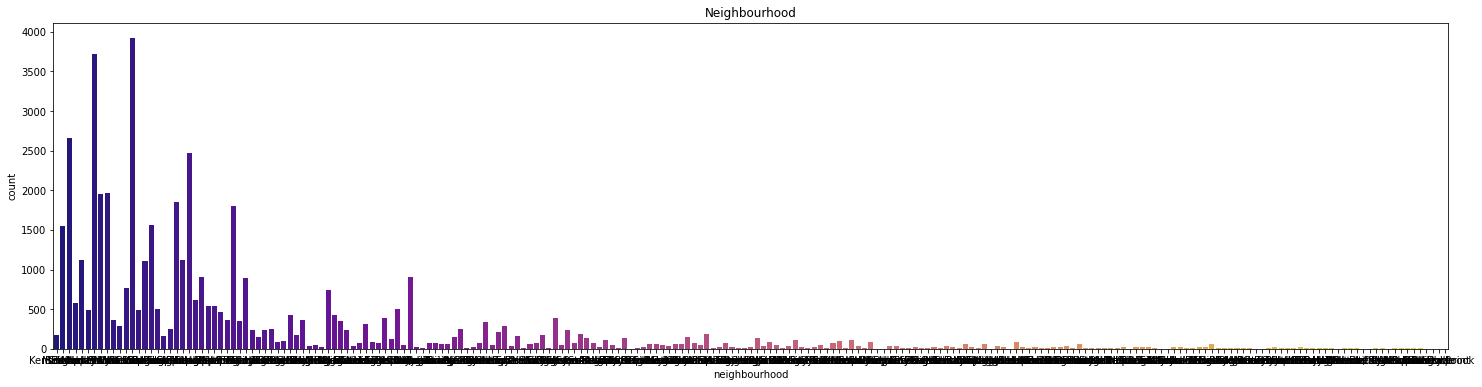

In [ ]:
sns.countplot(airbnb['neighbourhood'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(25,6)
plt.title('Neighbourhood')
plt.show()

Plot Room Type

In [ ]:
airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

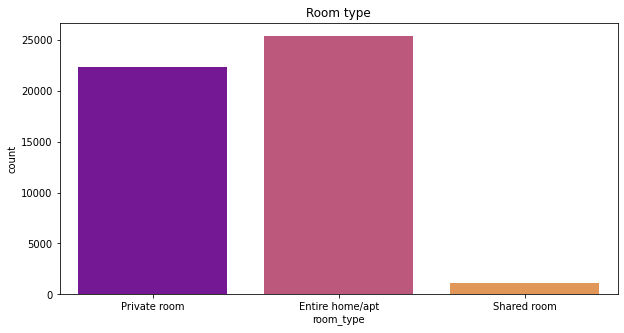

In [ ]:
sns.countplot(airbnb['room_type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.title('Room type')
plt.show()

Plot Relation between neighbourgroup and Availability of Room

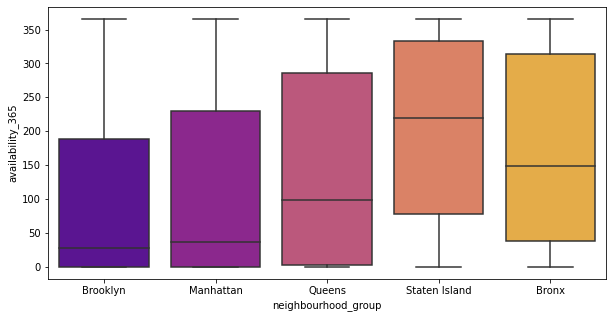

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=airbnb, x='neighbourhood_group',y='availability_365',palette='plasma')
plt.show()

Plot Map of Neighbourhood Group

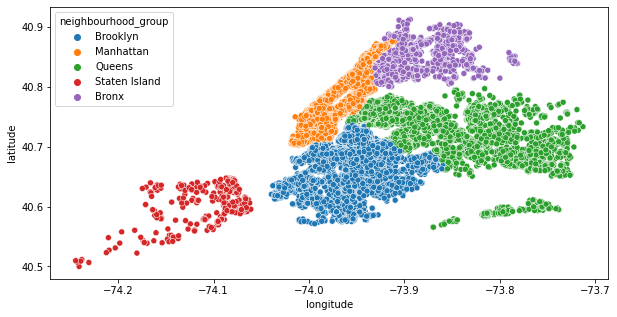

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.neighbourhood_group)
plt.show()

Plot Map of Neighbourhood

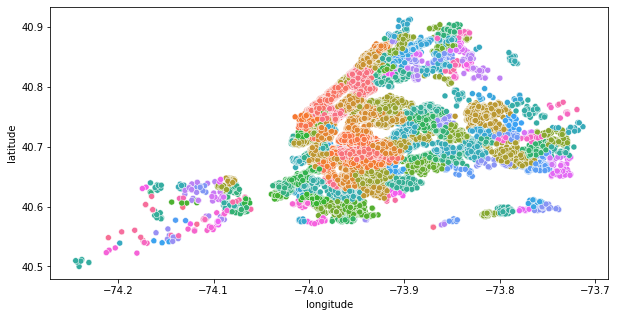

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.neighbourhood, legend = False)
plt.show()

Plot Map of Room type

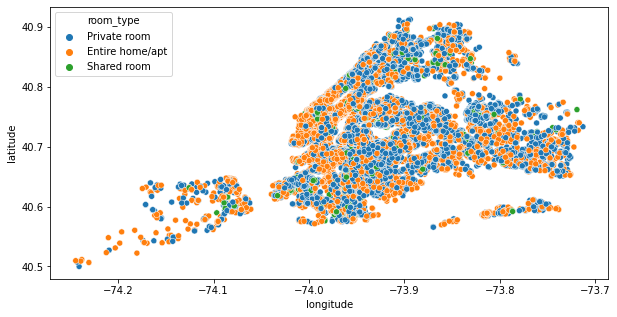

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.room_type)
plt.show()

Plot Map of Availability of Room

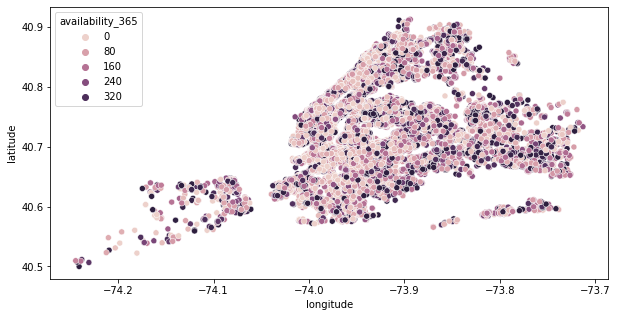

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.availability_365)
plt.show()

##### <h3><b>Data Exploration</h3></b>

Find out Top 10 host

In [ ]:
# Print what hosts have the most listings
top_host = airbnb.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [ ]:
# Print what hosts have the most listings
top_host_check=airbnb.calculated_host_listings_count.max()
top_host_check

327

In [ ]:
# Set figure size & style
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

In [ ]:
# Make dataframe with Host_ID and P_count
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df

,Host_ID,P_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


[Text(0, 0, '7503643'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '22541573'),
 Text(0, 0, '30283594'),
 Text(0, 0, '61391963'),
 Text(0, 0, '107434423'),
 Text(0, 0, '137358866'),
 Text(0, 0, '200380610'),
 Text(0, 0, '219517861')]

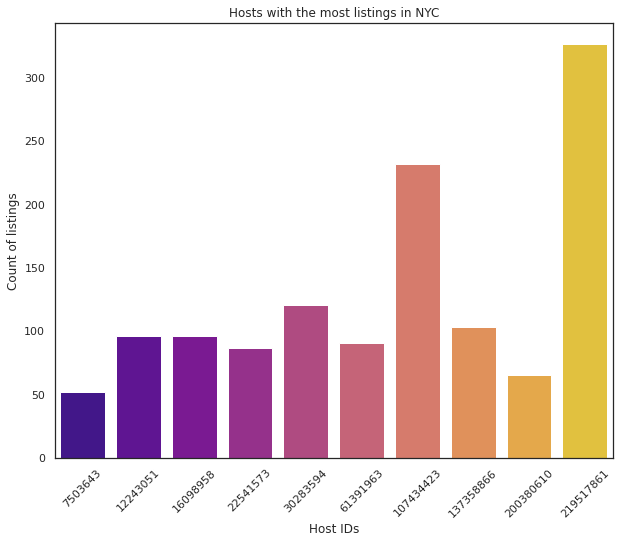

In [ ]:
# Visualize the top host's id and count of listings
viz_1=sns.barplot(x="Host_ID", y="P_Count", data=top_host_df,
                 palette='plasma')
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

Find out more about our neighborhoods

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

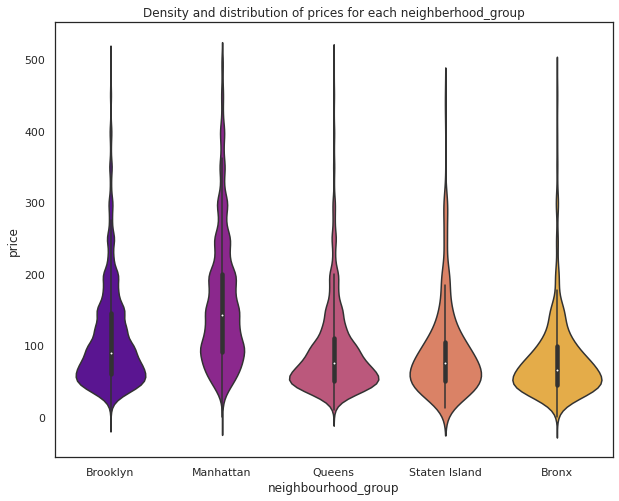

In [ ]:
# Create sub-dataframe with no extreme valuses (less than 500)
sub_6=airbnb[airbnb.price < 500]

# Use violinplot to show density and distribution of prices
viz_2=sns.violinplot(data=sub_6, x='neighbourhood_group', y='price', palette='plasma')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

Find out top 10 neighbourhoods

In [ ]:
# Find top 10 neighbourhoods
airbnb.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

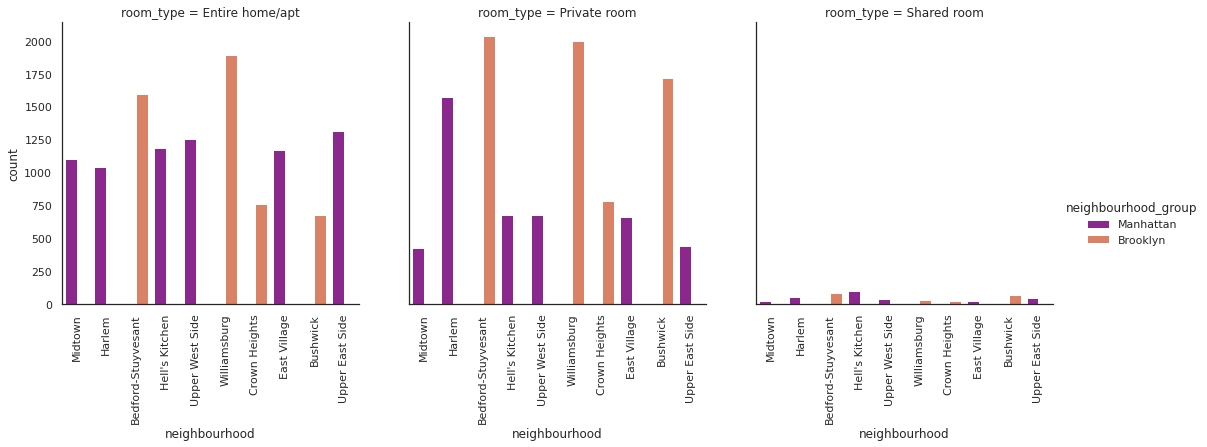

In [ ]:
# Grab top 10 neighbourhoods for sub-dataframe
sub_7 = airbnb.loc[airbnb['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
viz_3 = sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count', palette='plasma')
viz_3.set_xticklabels(rotation=90)

Scatterplot representation of availability_365 and price through latitude and longitude

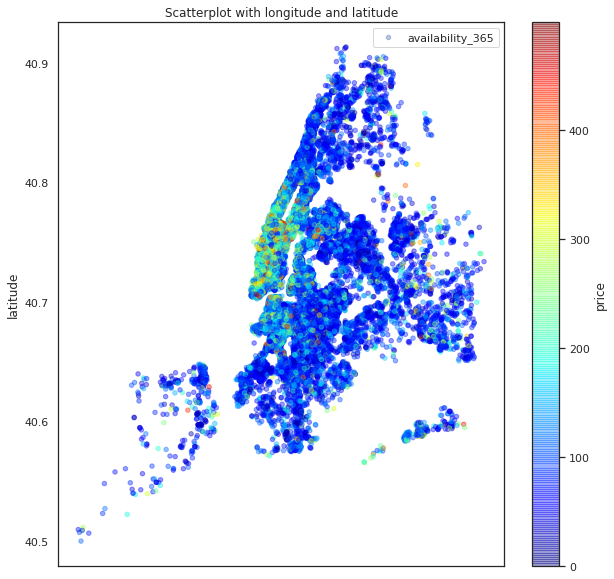

In [ ]:
# Visualize with scatterplot
viz_4=sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,10),title='Scatterplot with longitude and latitude')
viz_4.legend()

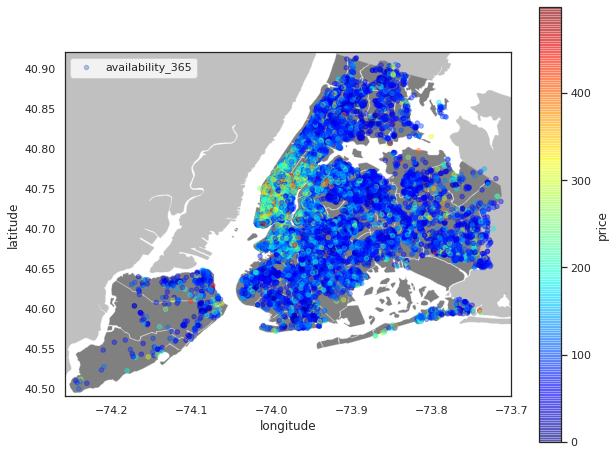

In [ ]:
import urllib
# Initializing the figure size
plt.figure(figsize=(10,8))

# Loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)

# Scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()

# Using scatterplot again
sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()

##### <h3><b>Outlier Handling</h3></b>

In [ ]:
def outliars(df,column):
    Q1 = np.percentile(df[column],25)
    Q3 = np.percentile(df[column],75)
    IQR = Q3 - Q1
    outlier_step = 1.5 * IQR
    outliers_index = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index
    return outliers_index

In [ ]:
#price outlier handling
outliers_index = outliars(airbnb,'price')

airbnb.drop(outliers_index, inplace=True)
airbnb.reset_index(drop=True, inplace=True)
airbnb.drop(airbnb[airbnb['price']==0].index,inplace=True)
airbnb.reset_index(drop=True, inplace=True)

In [ ]:
#outliers_index = outliars(airbnb,'minimum_nights')
#airbnb.drop(outliers_index, inplace=True)
#airbnb.reset_index(drop=True, inplace=True)
#airbnb.drop(airbnb[airbnb['minimum_nights']==0].index,inplace=True)
#airbnb.reset_index(drop=True, inplace=True)

In [ ]:
#outliers_index = outliars(airbnb,'calculated_host_listings_count')
#airbnb.drop(outliers_index, inplace=True)
#airbnb.reset_index(drop=True, inplace=True)
#airbnb.drop(airbnb[airbnb['calculated_host_listings_count']==0].index,inplace=True)
#airbnb.reset_index(drop=True, inplace=True)

In [ ]:
airbnb['reviews_per_month'] = np.where(airbnb['reviews_per_month']>31,31,airbnb['reviews_per_month'])

In [ ]:
airbnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,45912.00,45912.00,45912.00,45912.00,45912.00,45912.00,45912.00,45912.00,45912.00
mean,66328772.29,40.73,-73.95,120.00,6.94,23.94,1.11,6.64,109.38
std,77563702.45,0.06,0.05,68.13,19.86,45.32,1.60,31.01,130.28
min,2438.00,40.50,-74.24,10.00,1.00,0.00,0.00,1.00,0.00
25%,7720365.75,40.69,-73.98,65.00,1.00,1.00,0.05,1.00,0.00
50%,30283594.00,40.72,-73.95,100.00,2.00,5.00,0.38,1.00,39.00
75%,105512113.25,40.76,-73.93,159.00,5.00,24.00,1.62,2.00,217.00
max,274321313.00,40.91,-73.71,334.00,1250.00,629.00,31.00,327.00,365.00


##### <h3><b>Data scaling and encoding</h3></b>

In [ ]:
data = airbnb

In [ ]:
data.drop(['host_id','latitude','longitude','neighbourhood','number_of_reviews','reviews_per_month'], axis = 1, inplace = True)

Extract Categorical features and Numerical features

In [ ]:
categorical_features = data.select_dtypes(include=['object'])
print(categorical_features.head())
print('Categorical features: {}'.format(categorical_features.shape))

  neighbourhood_group        room_type
0            Brooklyn     Private room
1           Manhattan  Entire home/apt
2           Manhattan     Private room
3            Brooklyn  Entire home/apt
4           Manhattan  Entire home/apt
Categorical features: (45912, 2)


In [ ]:
numerical_features = data.select_dtypes(exclude=['object'])
print(numerical_features.head())
print('numerical_features features: {}'.format(numerical_features.shape))

   price  minimum_nights  calculated_host_listings_count  availability_365
0    149               1                               6               365
1    225               1                               2               355
2    150               3                               1               365
3     89               1                               1               194
4     80              10                               1                 0
numerical_features features: (45912, 4)


Standard Scaling + Label Encoding [Git Link](https://github.com/pjs990301/New_York_City_Airbnb_Open_Data/blob/2d548b14392acbcfac2a8bfafaba2ace7a3a6cfe/NewYorkAirbnbOpenData/New_York_Aribnb.py#L18)



In [ ]:
ss_label_X, ss_label_y, Processed_ss_label = nyc.Standard_Label(numerical_features,categorical_features)

In [ ]:
Processed_ss_label

,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group,room_type,price
0,-0.30,-0.02,1.96,1,1,149
1,-0.30,-0.15,1.89,2,0,225
2,-0.20,-0.18,1.96,2,1,150
3,-0.30,-0.18,0.65,1,0,89
4,0.15,-0.18,-0.84,2,0,80
...,...,...,...,...,...,...
45907,-0.25,-0.15,-0.77,1,1,70
45908,-0.15,-0.15,-0.56,1,1,40
45909,0.15,-0.18,-0.63,2,0,115
45910,-0.30,-0.02,-0.82,2,2,55


Standard Scaling + OneHot Encoding [Git Link](https://github.com/pjs990301/New_York_City_Airbnb_Open_Data/blob/2d548b14392acbcfac2a8bfafaba2ace7a3a6cfe/NewYorkAirbnbOpenData/New_York_Aribnb.py#L43)



In [ ]:
ss_oneHot_X,ss_oneHot_y, Processed_ss_oneHot = nyc.Standard_OneHot(numerical_features,categorical_features)

In [ ]:
Processed_ss_oneHot

,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group_0,neighbourhood_group_1,neighbourhood_group_2,neighbourhood_group_3,neighbourhood_group_4,room_type_0,room_type_1,room_type_2,price
0,-0.30,-0.02,1.96,0,1,0,0,0,0,1,0,149
1,-0.30,-0.15,1.89,0,0,1,0,0,1,0,0,225
2,-0.20,-0.18,1.96,0,0,1,0,0,0,1,0,150
3,-0.30,-0.18,0.65,0,1,0,0,0,1,0,0,89
4,0.15,-0.18,-0.84,0,0,1,0,0,1,0,0,80
...,...,...,...,...,...,...,...,...,...,...,...,...
45907,-0.25,-0.15,-0.77,0,1,0,0,0,0,1,0,70
45908,-0.15,-0.15,-0.56,0,1,0,0,0,0,1,0,40
45909,0.15,-0.18,-0.63,0,0,1,0,0,1,0,0,115
45910,-0.30,-0.02,-0.82,0,0,1,0,0,0,0,1,55


Robust Scaling + Label Encoding [Git Link](https://github.com/pjs990301/New_York_City_Airbnb_Open_Data/blob/2d548b14392acbcfac2a8bfafaba2ace7a3a6cfe/NewYorkAirbnbOpenData/New_York_Aribnb.py#L66)


In [ ]:
rs_label_X, rs_label_y, Processed_rs_label = nyc.Robust_Label(numerical_features,categorical_features)

In [ ]:
Processed_rs_label

,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group,room_type,price
0,-0.25,5.00,1.50,1,1,149
1,-0.25,1.00,1.46,2,0,225
2,0.25,0.00,1.50,2,1,150
3,-0.25,0.00,0.71,1,0,89
4,2.00,0.00,-0.18,2,0,80
...,...,...,...,...,...,...
45907,0.00,1.00,-0.14,1,1,70
45908,0.50,1.00,-0.01,1,1,40
45909,2.00,0.00,-0.06,2,0,115
45910,-0.25,5.00,-0.17,2,2,55


Robust Scaling + OneHot Encoding [Git Link](https://github.com/pjs990301/New_York_City_Airbnb_Open_Data/blob/2d548b14392acbcfac2a8bfafaba2ace7a3a6cfe/NewYorkAirbnbOpenData/New_York_Aribnb.py#L91)

In [ ]:
rs_oneHot_X, rs_oneHot_y, Processed_rs_oneHot = nyc.Robust_OneHot(numerical_features,categorical_features)

In [ ]:
Processed_rs_oneHot

,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group_0,neighbourhood_group_1,neighbourhood_group_2,neighbourhood_group_3,neighbourhood_group_4,room_type_0,room_type_1,room_type_2,price
0,-0.25,5.00,1.50,0,1,0,0,0,0,1,0,149
1,-0.25,1.00,1.46,0,0,1,0,0,1,0,0,225
2,0.25,0.00,1.50,0,0,1,0,0,0,1,0,150
3,-0.25,0.00,0.71,0,1,0,0,0,1,0,0,89
4,2.00,0.00,-0.18,0,0,1,0,0,1,0,0,80
...,...,...,...,...,...,...,...,...,...,...,...,...
45907,0.00,1.00,-0.14,0,1,0,0,0,0,1,0,70
45908,0.50,1.00,-0.01,0,1,0,0,0,0,1,0,40
45909,2.00,0.00,-0.06,0,0,1,0,0,1,0,0,115
45910,-0.25,5.00,-0.17,0,0,1,0,0,0,0,1,55


Min-Max Scaling + Label Encoding [Git Link](https://github.com/pjs990301/New_York_City_Airbnb_Open_Data/blob/2d548b14392acbcfac2a8bfafaba2ace7a3a6cfe/NewYorkAirbnbOpenData/New_York_Aribnb.py#L114)

In [ ]:
mms_label_X, mms_label_y, Processed_MinMax_label = nyc.MinMax_Label(numerical_features,categorical_features)

In [ ]:
Processed_MinMax_label

,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group,room_type,price
0,0.00,0.02,1.00,1,1,149
1,0.00,0.00,0.97,2,0,225
2,0.00,0.00,1.00,2,1,150
3,0.00,0.00,0.53,1,0,89
4,0.01,0.00,0.00,2,0,80
...,...,...,...,...,...,...
45907,0.00,0.00,0.02,1,1,70
45908,0.00,0.00,0.10,1,1,40
45909,0.01,0.00,0.07,2,0,115
45910,0.00,0.02,0.01,2,2,55


Min-Max Scaling + OneHot Encoding [Git Link](https://github.com/pjs990301/New_York_City_Airbnb_Open_Data/blob/2d548b14392acbcfac2a8bfafaba2ace7a3a6cfe/NewYorkAirbnbOpenData/New_York_Aribnb.py#L139)

In [ ]:
mms_oneHot_X, mms_oneHot_y, Processed_MinMax_oneHot = nyc.Robust_OneHot(numerical_features,categorical_features)

In [ ]:
Processed_MinMax_oneHot

,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group_0,neighbourhood_group_1,neighbourhood_group_2,neighbourhood_group_3,neighbourhood_group_4,room_type_0,room_type_1,room_type_2,price
0,-0.25,5.00,1.50,0,1,0,0,0,0,1,0,149
1,-0.25,1.00,1.46,0,0,1,0,0,1,0,0,225
2,0.25,0.00,1.50,0,0,1,0,0,0,1,0,150
3,-0.25,0.00,0.71,0,1,0,0,0,1,0,0,89
4,2.00,0.00,-0.18,0,0,1,0,0,1,0,0,80
...,...,...,...,...,...,...,...,...,...,...,...,...
45907,0.00,1.00,-0.14,0,1,0,0,0,0,1,0,70
45908,0.50,1.00,-0.01,0,1,0,0,0,0,1,0,40
45909,2.00,0.00,-0.06,0,0,1,0,0,1,0,0,115
45910,-0.25,5.00,-0.17,0,0,1,0,0,0,0,1,55


### <b>5. Data Analysis </b>

#### **Specification**
1.   <b>Importing Libaries </b>
2.   <b>Regression </b><br>
      *   Standard Scaling + Label Encoding + LinearRegression
      *   Standard Scaling + OneHot Encoding + LinearRegression
      *   Robust Scaling + Label Encoding + LinearRegression
      *   Robust Scaling + OneHot Encoding + LinearRegression
      *   Min-Max Scaling + Label Encoding + LinearRegression
      *   Min-Max Scaling + OneHot Encoding + LinearRegression
3.   <b>classification </b><br>
      *   Standard Scaling + Label Encoding + ExtraTreesClassifier
      *   Standard Scaling + OneHot Encoding + ExtraTreesClassifier
      *   Robust Scaling + Label Encoding + ExtraTreesClassifier
      *   Robust Scaling + OneHot Encoding + ExtraTreesClassifier
      *   Min-Max Scaling + Label Encoding + ExtraTreesClassifier
      *   Min-Max Scaling + OneHot Encoding + ExtraTreesClassifier

##### <h3><b>Importing Libraries

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

pd.options.display.float_format = '{:.17f}'.format

##### <h3><b>Regression</b></h3>

In [ ]:
regression_score = pd.DataFrame(columns=['Scaling','Encoding','Algorithm','Train_score','Test_score','R2_Score','MAE','MSE','RMSE','MAPE'])

###### <h3><b>LinearRegression</b></h3>

Standard Scaling + Label Encoding + LinearRegression


In [ ]:
# Train - Test split 
# def print_train_test(scaling_encoding_x, scaling_encoding_y, test_size, random_state)
X_train, X_test, y_train, y_test = nyc.print_train_test(ss_label_X, ss_label_y, 0.2, 42) 

Dimensions of the training feature matrix: (36729, 5)
Dimensions of the training target vector: (36729, 1)
Dimensions of the test feature matrix: (9183, 5)
Dimensions of the test target vector: (9183, 1)


In [ ]:
#Prepare a Linear Regression Model
SLL_train_score, SLL_test_score, SLL_score, SLL_MAE, SLL_MSE,SLL_RMSE, SLL_MAPE = nyc.SE_LinearRegression(X_train, X_test, y_train, y_test)
regression_score.loc[len(regression_score)]=['Standard','Label','LinearRegression', SLL_train_score, SLL_test_score, SLL_score,SLL_MAE,SLL_MSE,SLL_RMSE,SLL_MAPE]

Standard Scaling + OneHot Encoding + LinearRegression

In [ ]:
# Train - Test split 
# def print_train_test(scaling_encoding_x, scaling_encoding_y, test_size, random_state)
X_train, X_test, y_train, y_test = nyc.print_train_test(ss_oneHot_X, ss_oneHot_y, 0.2, 42) 

Dimensions of the training feature matrix: (36729, 11)
Dimensions of the training target vector: (36729, 1)
Dimensions of the test feature matrix: (9183, 11)
Dimensions of the test target vector: (9183, 1)


In [ ]:
#Prepare a Linear Regression Model
SOL_train_score, SOL_test_score, SOL_score, SOL_MAE, SOL_MSE ,SOL_RMSE, SOL_MAPE = nyc.SE_LinearRegression(X_train, X_test, y_train, y_test)
regression_score.loc[len(regression_score)]=['Standard','OneHot','LinearRegression',SOL_train_score, SOL_test_score, SOL_score,SOL_MAE,SOL_MSE,SOL_RMSE,SOL_MAPE]

Robust Scaling + Label Encoding + LinearRegression

In [ ]:
# Train - Test split 
# def print_train_test(scaling_encoding_x, scaling_encoding_y, test_size, random_state)
X_train, X_test, y_train, y_test = nyc.print_train_test(rs_label_X, rs_label_y, 0.2, 42) 

Dimensions of the training feature matrix: (36729, 5)
Dimensions of the training target vector: (36729, 1)
Dimensions of the test feature matrix: (9183, 5)
Dimensions of the test target vector: (9183, 1)


In [ ]:
#Prepare a Linear Regression Model
RLL_train_score, RLL_test_score, RLL_score, RLL_MAE, RLL_MSE, RLL_RMSE, RLL_MAPE = nyc.SE_LinearRegression(X_train, X_test, y_train, y_test)
regression_score.loc[len(regression_score)]=['Robust','Label','LinearRegression',RLL_train_score, RLL_test_score,RLL_score,RLL_MAE,RLL_MSE,RLL_RMSE,RLL_MAPE]

Robust Scaling + OneHot Encoding + LinearRegression

In [ ]:
# Train - Test split 
# def print_train_test(scaling_encoding_x, scaling_encoding_y, test_size, random_state)
X_train, X_test, y_train, y_test = nyc.print_train_test(rs_oneHot_X, rs_oneHot_y, 0.2, 42) 

Dimensions of the training feature matrix: (36729, 11)
Dimensions of the training target vector: (36729, 1)
Dimensions of the test feature matrix: (9183, 11)
Dimensions of the test target vector: (9183, 1)


In [ ]:
#Prepare a Linear Regression Model
ROL_train_score, ROL_test_score, ROL_score, ROL_MAE, ROL_MSE,ROL_RMSE, ROL_MAPE = nyc.SE_LinearRegression(X_train, X_test, y_train, y_test)
regression_score.loc[len(regression_score)]=['Robust','OneHot','LinearRegression', ROL_train_score, ROL_test_score, ROL_score,ROL_MAE,ROL_MSE,ROL_RMSE,ROL_MAPE]

Min-Max Scaling + Label Encoding + LinearRegression

In [ ]:
# Train - Test split 
# def print_train_test(scaling_encoding_x, scaling_encoding_y, test_size, random_state)
X_train, X_test, y_train, y_test = nyc.print_train_test(mms_label_X, mms_label_y, 0.2, 42) 

Dimensions of the training feature matrix: (36729, 5)
Dimensions of the training target vector: (36729, 1)
Dimensions of the test feature matrix: (9183, 5)
Dimensions of the test target vector: (9183, 1)


In [ ]:
#Prepare a Linear Regression Model
MLL_train_score, MLL_test_score, MLL_score, MLL_MAE, MLL_MSE,MLL_RMSE, MLL_MAPE = nyc.SE_LinearRegression(X_train, X_test, y_train, y_test)
regression_score.loc[len(regression_score)]=['Min-Max','Label','LinearRegression',MLL_train_score, MLL_test_score,MLL_score, MLL_MAE, MLL_MSE ,MLL_RMSE, MLL_MAPE]

Min-Max Scaling + OneHot Encoding + LinearRegression

In [ ]:
# Train - Test split 
# def print_train_test(scaling_encoding_x, scaling_encoding_y, test_size, random_state)
X_train, X_test, y_train, y_test = nyc.print_train_test(mms_oneHot_X, mms_oneHot_y, 0.2, 42) 

Dimensions of the training feature matrix: (36729, 11)
Dimensions of the training target vector: (36729, 1)
Dimensions of the test feature matrix: (9183, 11)
Dimensions of the test target vector: (9183, 1)


In [ ]:
#Prepare a Linear Regression Model
MOL_train_score, MOL_test_score, MOL_score, MOL_MAE, MOL_MSE,MOL_RMSE, MOL_MAPE = nyc.SE_LinearRegression(X_train, X_test, y_train, y_test)
regression_score.loc[len(regression_score)]=['Min-Max','OneHot','LinearRegression', MOL_train_score, MOL_test_score, MOL_score, MOL_MAE, MOL_MSE,MOL_RMSE, MOL_MAPE]

###### <h3><b>PolynomialRegression</b></h3>

Standard Scaling + Label Encoding + PolynomialRegression

In [ ]:
# Train - Test split 
# def print_train_test(scaling_encoding_x, scaling_encoding_y, test_size, random_state)
X_train, X_test, y_train, y_test = nyc.print_train_test(ss_label_X, ss_label_y, 0.2, 42) 

Dimensions of the training feature matrix: (36729, 5)
Dimensions of the training target vector: (36729, 1)
Dimensions of the test feature matrix: (9183, 5)
Dimensions of the test target vector: (9183, 1)


In [ ]:
SLP_train_score, SLP_test_score, SLP_score, SLP_MAE, SLP_MSE, SLP_RMSE, SLP_MAPE = nyc.SE_PolynomialRegression(X_train, X_test, y_train, y_test)
regression_score.loc[len(regression_score)]=['Standard','Label','PolynomialRegression', SLP_train_score, SLP_test_score, SLP_score, SLP_MAE, SLP_MSE ,SLP_RMSE, SLP_MAPE]

Standard Scaling + OneHot Encoding + PolynomialRegression

In [ ]:
# Train - Test split 
# def print_train_test(scaling_encoding_x, scaling_encoding_y, test_size, random_state)
X_train, X_test, y_train, y_test = nyc.print_train_test(ss_oneHot_X, ss_oneHot_y, 0.2, 42) 

Dimensions of the training feature matrix: (36729, 11)
Dimensions of the training target vector: (36729, 1)
Dimensions of the test feature matrix: (9183, 11)
Dimensions of the test target vector: (9183, 1)


In [ ]:
SOP_train_score, SOP_test_score, SOP_score, SOP_MAE, SOP_MSE, SOP_RMSE, SOP_MAPE = nyc.SE_PolynomialRegression(X_train, X_test, y_train, y_test)
regression_score.loc[len(regression_score)]=['Standard','OneHot','PolynomialRegression', SOP_train_score, SOP_test_score,  SOP_score, SOP_MAE, SOP_MSE ,SOP_RMSE, SOP_MAPE]

Robust Scaling + Label Encoding + PolynomialRegression

In [ ]:
# Train - Test split 
# def print_train_test(scaling_encoding_x, scaling_encoding_y, test_size, random_state)
X_train, X_test, y_train, y_test = nyc.print_train_test(rs_label_X, rs_label_y, 0.2, 42) 

Dimensions of the training feature matrix: (36729, 5)
Dimensions of the training target vector: (36729, 1)
Dimensions of the test feature matrix: (9183, 5)
Dimensions of the test target vector: (9183, 1)


In [ ]:
RLP_train_score, RLP_test_score, RLP_score, RLP_MAE, RLP_MSE, RLP_RMSE, RLP_MAPE = nyc.SE_PolynomialRegression(X_train, X_test, y_train, y_test)
regression_score.loc[len(regression_score)]=['Robust','Label','PolynomialRegression', RLP_train_score, RLP_test_score, RLP_score, RLP_MAE, RLP_MSE ,RLP_RMSE, RLP_MAPE]

Robust Scaling + OneHot Encoding + PolynomialRegression

In [ ]:
# Train - Test split 
# def print_train_test(scaling_encoding_x, scaling_encoding_y, test_size, random_state)
X_train, X_test, y_train, y_test = nyc.print_train_test(rs_oneHot_X, rs_oneHot_y, 0.2, 42) 

Dimensions of the training feature matrix: (36729, 11)
Dimensions of the training target vector: (36729, 1)
Dimensions of the test feature matrix: (9183, 11)
Dimensions of the test target vector: (9183, 1)


In [ ]:
ROP_train_score, ROP_test_score, ROP_score, ROP_MAE, ROP_MSE, ROP_RMSE, ROP_MAPE = nyc.SE_PolynomialRegression(X_train, X_test, y_train, y_test)
regression_score.loc[len(regression_score)]=['Robust','OneHot','PolynomialRegression',ROP_train_score, ROP_test_score, ROP_score, ROP_MAE, ROP_MSE ,ROP_RMSE, ROP_MAPE]

Min-Max Scaling + Label Encoding + PolynomialRegression

In [ ]:
# Train - Test split 
# def print_train_test(scaling_encoding_x, scaling_encoding_y, test_size, random_state)
X_train, X_test, y_train, y_test = nyc.print_train_test(mms_label_X, mms_label_y, 0.2, 42) 

Dimensions of the training feature matrix: (36729, 5)
Dimensions of the training target vector: (36729, 1)
Dimensions of the test feature matrix: (9183, 5)
Dimensions of the test target vector: (9183, 1)


In [ ]:
MLP_train_score, MLP_test_score, MLP_score, MLP_MAE, MLP_MSE, MLP_RMSE, MLP_MAPE = nyc.SE_PolynomialRegression(X_train, X_test, y_train, y_test)
regression_score.loc[len(regression_score)]=['Min-Max','Label','PolynomialRegression',MLP_train_score, MLP_test_score, MLP_score, MLP_MAE, MLP_MSE ,MLP_RMSE, MLP_MAPE]

Min-Max Scaling + OneHot Encoding + PolynomialRegression

In [ ]:
# Train - Test split 
# def print_train_test(scaling_encoding_x, scaling_encoding_y, test_size, random_state)
X_train, X_test, y_train, y_test = nyc.print_train_test(mms_label_X, mms_label_y, 0.2, 42) 

Dimensions of the training feature matrix: (36729, 5)
Dimensions of the training target vector: (36729, 1)
Dimensions of the test feature matrix: (9183, 5)
Dimensions of the test target vector: (9183, 1)


In [ ]:
MOP_train_score, MOP_test_score, MOP_score, MOP_MAE, MOP_MSE, MOP_RMSE, MOP_MAPE = nyc.SE_PolynomialRegression(X_train, X_test, y_train, y_test)
regression_score.loc[len(regression_score)]=['Min-Max','OneHot','PolynomialRegression', MOP_train_score, MOP_test_score, MOP_score, MOP_MAE, MOP_MSE, MOP_RMSE, MOP_MAPE]

###### <h3><b>Score</b></h3>

In [ ]:
regression_score.sort_values(by=['Test_score'],ascending=[False])


,Scaling,Encoding,Algorithm,Train_score,Test_score,R2_Score,MAE,MSE,RMSE,MAPE
7,Standard,OneHot,PolynomialRegression,0.47385099174640755,0.46992883839346822,0.46992883839346822,36.21008451378229864,2400.21078829030420820,48.99194615740738357,0.36478210421014806
9,Robust,OneHot,PolynomialRegression,0.47385099218327864,0.46992816709442009,0.46992816709442009,36.21018706814926702,2400.21382799390312357,48.99197717988020884,0.36478534240126026
1,Standard,OneHot,LinearRegression,0.46390766357777102,0.46279474134405774,0.46279474134405774,36.74527668610029707,2432.51463340198324659,49.32052953286271446,0.37209794302526589
3,Robust,OneHot,LinearRegression,0.46390766357777102,0.46279474134405774,0.46279474134405774,36.74527668610029707,2432.51463340198324659,49.32052953286271446,0.37209794302526589
5,Min-Max,OneHot,LinearRegression,0.46390766357777102,0.46279474134405774,0.46279474134405774,36.74527668610029707,2432.51463340198324659,49.32052953286271446,0.37209794302526589
8,Robust,Label,PolynomialRegression,0.45255906997733653,0.44634597139962040,0.44634597139962040,37.47235339161674261,2506.99617085270347161,50.06991283048836294,0.38522241167057603
10,Min-Max,Label,PolynomialRegression,0.45255906997733641,0.44634597139961618,0.44634597139961618,37.47235339161675682,2506.99617085272257100,50.06991283048855479,0.38522241167057736
11,Min-Max,OneHot,PolynomialRegression,0.45255906997733641,0.44634597139961618,0.44634597139961618,37.47235339161675682,2506.99617085272257100,50.06991283048855479,0.38522241167057736
6,Standard,Label,PolynomialRegression,0.45255906997733641,0.44634597139961607,0.44634597139961607,37.47235339161674261,2506.99617085272302575,50.06991283048856189,0.38522241167057669
0,Standard,Label,LinearRegression,0.39146915561752194,0.38595433100468679,0.38595433100468679,40.15313865791302561,2780.45505203225684454,52.73002040614299801,0.42676939075859183


##### <h3><b>Classification</b></h3>

In [ ]:
classification_score = pd.DataFrame(columns=['Scaling','Encoding','Algorithm','Train_score','Test_score'])

###### <h3><b>ExtraTreesClassifier</b></h3>

<h6><b>Standard Scaling + Label Encoding + ExtraTreesClassifier</b></h6>

In [ ]:
# Train - Test split 
# def print_train_test(scaling_encoding_x, scaling_encoding_y, test_size, random_state)
X_train, X_test, y_train, y_test = nyc.print_train_test(ss_label_X, ss_label_y, 0.2, 42) 

Dimensions of the training feature matrix: (36729, 5)
Dimensions of the training target vector: (36729, 1)
Dimensions of the test feature matrix: (9183, 5)
Dimensions of the test target vector: (9183, 1)


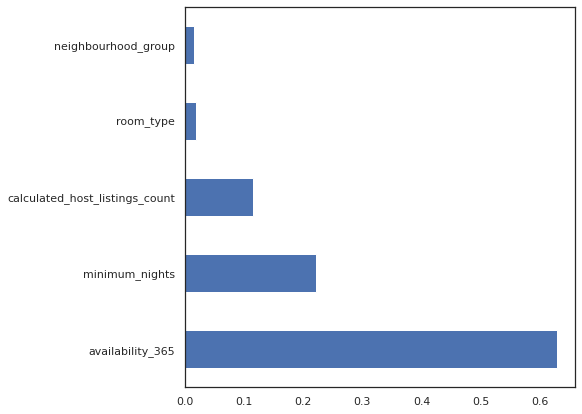

In [ ]:
SLE_train_score, SLE_test_score = nyc.SE_ExtraTreesClassifier(X_train, X_test, y_train, y_test)
classification_score.loc[len(classification_score)]=['Standard','Label','ExtraTreesClassifier',SLE_train_score,SLE_test_score]

<h6><b>Standard Scaling + OneHot Encoding + ExtraTreesClassifier</b></h6> 

In [ ]:
# Train - Test split 
# def print_train_test(scaling_encoding_x, scaling_encoding_y, test_size, random_state)
X_train, X_test, y_train, y_test = nyc.print_train_test(ss_oneHot_X, ss_oneHot_y, 0.2, 42) 

Dimensions of the training feature matrix: (36729, 11)
Dimensions of the training target vector: (36729, 1)
Dimensions of the test feature matrix: (9183, 11)
Dimensions of the test target vector: (9183, 1)


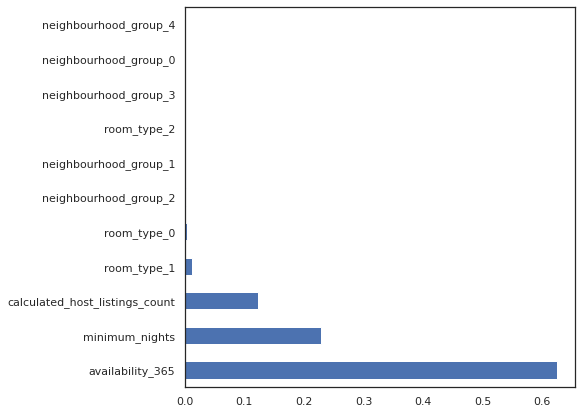

In [ ]:
SOE_train_score,SOE_test_score = nyc.SE_ExtraTreesClassifier(X_train, X_test, y_train, y_test)
classification_score.loc[len(classification_score)]=['Standard','OneHot','ExtraTreesClassifier',SOE_train_score,SOE_test_score]

<h6><b>Robust Scaling + Label Encoding + ExtraTreesClassifier</b></h6>

In [ ]:
# Train - Test split 
# def print_train_test(scaling_encoding_x, scaling_encoding_y, test_size, random_state)
X_train, X_test, y_train, y_test = nyc.print_train_test(rs_label_X, rs_label_y, 0.2, 42) 

Dimensions of the training feature matrix: (36729, 5)
Dimensions of the training target vector: (36729, 1)
Dimensions of the test feature matrix: (9183, 5)
Dimensions of the test target vector: (9183, 1)


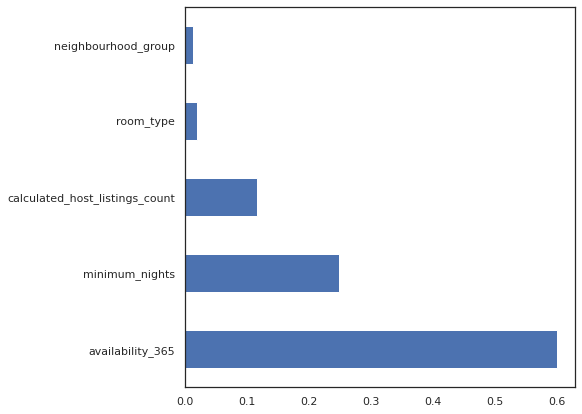

In [ ]:
RLE_train_score,RLE_test_score = nyc.SE_ExtraTreesClassifier(X_train, X_test, y_train, y_test)
classification_score.loc[len(classification_score)]=['Robust','Label','ExtraTreesClassifier',RLE_train_score,RLE_test_score]

<h6><b>Robust Scaling + OneHot Encoding + ExtraTreesClassifier</b></h6>

In [ ]:
# Train - Test split 
# def print_train_test(scaling_encoding_x, scaling_encoding_y, test_size, random_state)
X_train, X_test, y_train, y_test = nyc.print_train_test(rs_oneHot_X, rs_oneHot_y, 0.2, 42) 

Dimensions of the training feature matrix: (36729, 11)
Dimensions of the training target vector: (36729, 1)
Dimensions of the test feature matrix: (9183, 11)
Dimensions of the test target vector: (9183, 1)


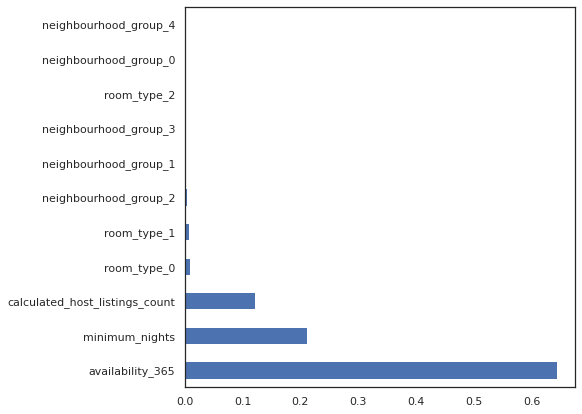

In [ ]:
ROE_train_score,ROE_test_score = nyc.SE_ExtraTreesClassifier(X_train, X_test, y_train, y_test)
classification_score.loc[len(classification_score)]=['Robust','OneHot','ExtraTreesClassifier',ROE_train_score,ROE_test_score]

<h6><b>Min-Max Scaling + Label Encoding + ExtraTreesClassifier</b></h6>

In [ ]:
# Train - Test split 
# def print_train_test(scaling_encoding_x, scaling_encoding_y, test_size, random_state)
X_train, X_test, y_train, y_test = nyc.print_train_test(mms_label_X, mms_label_y, 0.2, 42) 

Dimensions of the training feature matrix: (36729, 5)
Dimensions of the training target vector: (36729, 1)
Dimensions of the test feature matrix: (9183, 5)
Dimensions of the test target vector: (9183, 1)


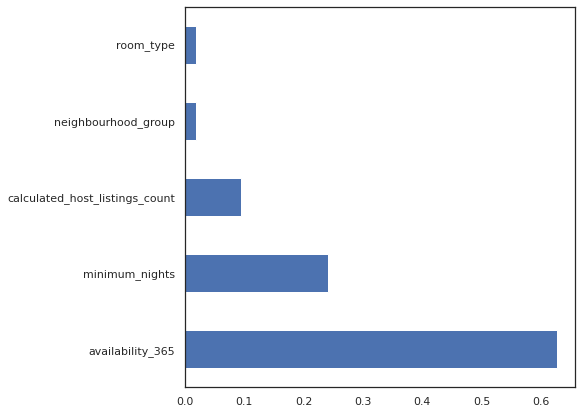

In [ ]:
MLE_train_score,MLE_test_score = nyc.SE_ExtraTreesClassifier(X_train, X_test, y_train, y_test)
classification_score.loc[len(classification_score)]=['Min-Max','Label','ExtraTreesClassifier',MLE_train_score,MLE_test_score]

<h6><b>Min-Max Scaling + OneHot Encoding + ExtraTreesClassifier</b></h6>



In [ ]:
# Train - Test split 
# def print_train_test(scaling_encoding_x, scaling_encoding_y, test_size, random_state)
X_train, X_test, y_train, y_test = nyc.print_train_test(mms_oneHot_X, mms_oneHot_y, 0.2, 42) 

Dimensions of the training feature matrix: (36729, 11)
Dimensions of the training target vector: (36729, 1)
Dimensions of the test feature matrix: (9183, 11)
Dimensions of the test target vector: (9183, 1)


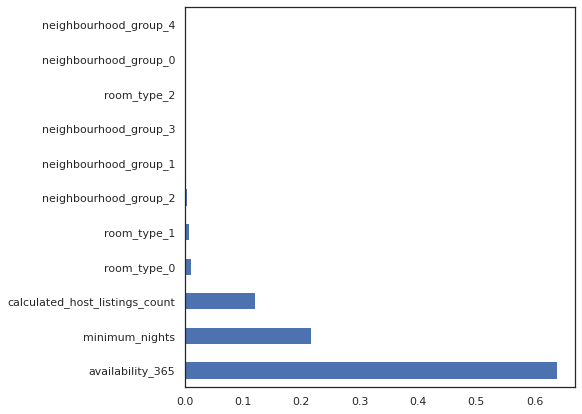

In [ ]:
MOE_train_score,MOE_test_score = nyc.SE_ExtraTreesClassifier(X_train, X_test, y_train, y_test)
classification_score.loc[len(classification_score)]=['Min-Max','OneHot','ExtraTreesClassifier',MOE_train_score,MOE_test_score]

###### <h3><b>KNeighborsClassifier</b></h3>

<h6><b>Standard Scaling + Label Encoding + KNeighborsClassifier</b></h6>

In [ ]:
# Train - Test split 
# def print_train_test(scaling_encoding_x, scaling_encoding_y, test_size, random_state)
X_train, X_test, y_train, y_test = nyc.print_train_test(ss_label_X, ss_label_y, 0.2, 42) 

Dimensions of the training feature matrix: (36729, 5)
Dimensions of the training target vector: (36729, 1)
Dimensions of the test feature matrix: (9183, 5)
Dimensions of the test target vector: (9183, 1)


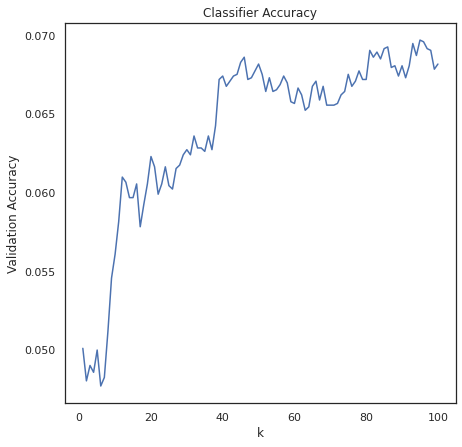

In [ ]:
SLK_train_score, SLK_test_score = nyc.SE_KNeighborsClassifier(X_train, X_test, y_train, y_test)
classification_score.loc[len(classification_score)]=['Standard','Label','KNeighborsClassifier',SLK_train_score,SLK_test_score]

<h6><b>Standard Scaling + OneHot Encoding + KNeighborsClassifier</b></h6>

In [ ]:
# Train - Test split 
# def print_train_test(scaling_encoding_x, scaling_encoding_y, test_size, random_state)
X_train, X_test, y_train, y_test = nyc.print_train_test(ss_oneHot_X, ss_oneHot_y, 0.2, 42) 

Dimensions of the training feature matrix: (36729, 11)
Dimensions of the training target vector: (36729, 1)
Dimensions of the test feature matrix: (9183, 11)
Dimensions of the test target vector: (9183, 1)


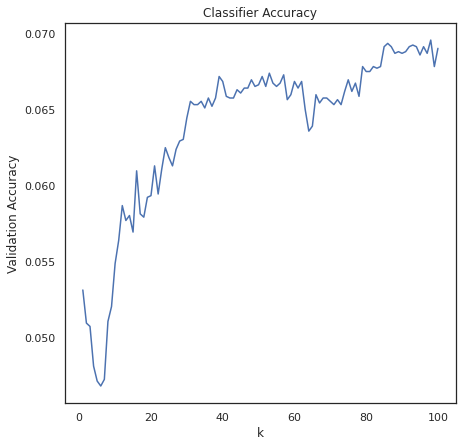

In [ ]:
SOK_train_score, SOK_test_score = nyc.SE_KNeighborsClassifier(X_train, X_test, y_train, y_test)
classification_score.loc[len(classification_score)]=['Standard','OneHot','KNeighborsClassifier',SOK_train_score,SOK_test_score]

<h6><b>Robust Scaling + Label Encoding + KNeighborsClassifier</b></h6>

In [ ]:
# Train - Test split 
# def print_train_test(scaling_encoding_x, scaling_encoding_y, test_size, random_state)
X_train, X_test, y_train, y_test = nyc.print_train_test(rs_label_X, rs_label_y, 0.2, 42) 

Dimensions of the training feature matrix: (36729, 5)
Dimensions of the training target vector: (36729, 1)
Dimensions of the test feature matrix: (9183, 5)
Dimensions of the test target vector: (9183, 1)


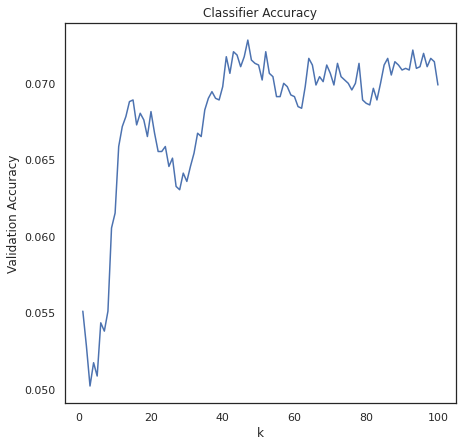

In [ ]:
RLK_train_score, RLK_test_score = nyc.SE_KNeighborsClassifier(X_train, X_test, y_train, y_test)
classification_score.loc[len(classification_score)]=['Robust','Label','KNeighborsClassifier',RLK_train_score,RLK_test_score]

<h6><b>Robust Scaling + OneHot Encoding + KNeighborsClassifier</b></h6>

In [ ]:
# Train - Test split 
# def print_train_test(scaling_encoding_x, scaling_encoding_y, test_size, random_state)
X_train, X_test, y_train, y_test = nyc.print_train_test(rs_oneHot_X, rs_oneHot_y, 0.2, 42) 

Dimensions of the training feature matrix: (36729, 11)
Dimensions of the training target vector: (36729, 1)
Dimensions of the test feature matrix: (9183, 11)
Dimensions of the test target vector: (9183, 1)


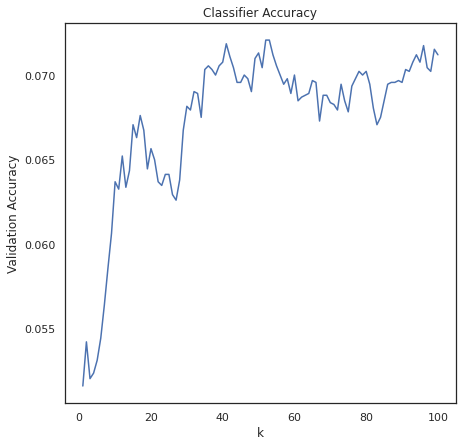

In [ ]:
ROK_train_score, ROK_test_score = nyc.SE_KNeighborsClassifier(X_train, X_test, y_train, y_test)
classification_score.loc[len(classification_score)]=['Robust','OneHot','KNeighborsClassifier',ROK_train_score, ROK_test_score]

<h6><b>Min-Max Scaling + Label Encoding + KNeighborsClassifier</b></h6>

In [ ]:
# Train - Test split 
# def print_train_test(scaling_encoding_x, scaling_encoding_y, test_size, random_state)
X_train, X_test, y_train, y_test = nyc.print_train_test(mms_label_X, mms_label_y, 0.2, 42) 

Dimensions of the training feature matrix: (36729, 5)
Dimensions of the training target vector: (36729, 1)
Dimensions of the test feature matrix: (9183, 5)
Dimensions of the test target vector: (9183, 1)


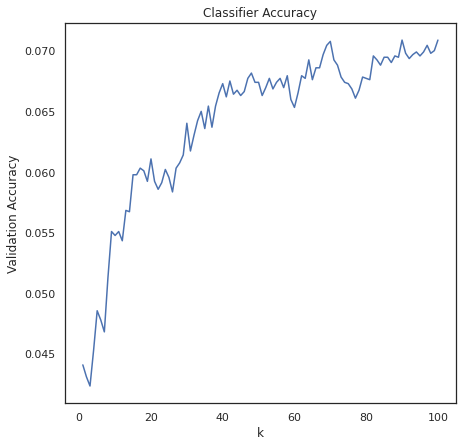

In [ ]:
MLK_train_score, MLK_test_score = nyc.SE_KNeighborsClassifier(X_train, X_test, y_train, y_test)
classification_score.loc[len(classification_score)]=['Min-Max','Label','KNeighborsClassifier',MLK_train_score, MLK_test_score]

<h6><b>Min-Max Scaling + OneHot Encoding + KNeighborsClassifier</b></h6>

In [ ]:
# Train - Test split 
# def print_train_test(scaling_encoding_x, scaling_encoding_y, test_size, random_state)
X_train, X_test, y_train, y_test = nyc.print_train_test(mms_oneHot_X, mms_oneHot_y, 0.2, 42) 

Dimensions of the training feature matrix: (36729, 11)
Dimensions of the training target vector: (36729, 1)
Dimensions of the test feature matrix: (9183, 11)
Dimensions of the test target vector: (9183, 1)


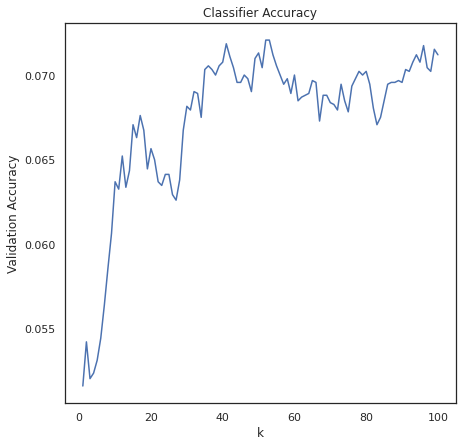

In [ ]:
MOK_train_score, MOK_test_score = nyc.SE_KNeighborsClassifier(X_train, X_test, y_train, y_test)
classification_score.loc[len(classification_score)]=['Min-Max','OneHot','KNeighborsClassifier', MOK_train_score, MOK_test_score]

###### <h3><b>Score</b></h3>

In [ ]:
classification_score.sort_values(by=['Test_score'],ascending=[False])

,Scaling,Encoding,Algorithm,Train_score,Test_score
0,Standard,Label,ExtraTreesClassifier,0.48969479158158402,0.06914951540890776
2,Robust,Label,ExtraTreesClassifier,0.48969479158158402,0.06860503103560928
1,Standard,OneHot,ExtraTreesClassifier,0.48969479158158402,0.06849613416094959
3,Robust,OneHot,ExtraTreesClassifier,0.48969479158158402,0.06849613416094959
4,Min-Max,Label,ExtraTreesClassifier,0.48969479158158402,0.06806054666231079
5,Min-Max,OneHot,ExtraTreesClassifier,0.48969479158158402,0.06718937166503321
9,Robust,OneHot,KNeighborsClassifier,0.20063165346184214,0.05314167483393226
11,Min-Max,OneHot,KNeighborsClassifier,0.20063165346184214,0.05314167483393226
8,Robust,Label,KNeighborsClassifier,0.19894361403795366,0.05085484046607863
6,Standard,Label,KNeighborsClassifier,0.19450570393966621,0.04998366546880104


### <b>6. Evaluation </b>


#### **Specification**
1.   <b>Importing Libaries </b>
2.   <b>Voting</b>
3.   <b>Bagging</b>

##### <h3><b>Importing Libraries

In [ ]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score


##### <h3><b>Voting</b></h3>

LinearRegression

In [ ]:
X_train, X_test, y_train, y_test = nyc.print_train_test(ss_oneHot_X, ss_oneHot_y, 0.2, 42) 

Dimensions of the training feature matrix: (36729, 11)
Dimensions of the training target vector: (36729, 1)
Dimensions of the test feature matrix: (9183, 11)
Dimensions of the test target vector: (9183, 1)


In [ ]:
grid_param = {
        'fit_intercept':[True,False], 
        'normalize':[True,False], 
        'copy_X':[True, False]
    }
Reg = LinearRegression()
grid_search_Reg = GridSearchCV(Reg , param_grid= grid_param, return_train_score=True)
grid_search_Reg.fit(X_train,y_train)
    
#print best parameter setting and best score
print(grid_search_Reg.best_params_)
print(grid_search_Reg.best_score_)

{'copy_X': True, 'fit_intercept': False, 'normalize': True}
0.4632981393002746


DecisionTreeRegressor

In [ ]:
X_train, X_test, y_train, y_test = nyc.print_train_test(ss_oneHot_X, ss_oneHot_y, 0.2, 42) 

Dimensions of the training feature matrix: (36729, 11)
Dimensions of the training target vector: (36729, 1)
Dimensions of the test feature matrix: (9183, 11)
Dimensions of the test target vector: (9183, 1)


In [ ]:
grid_param = {
        'max_depth' : range(1, 25),
        'min_samples_leaf' : [8, 12, 18],
        'splitter':['best','random']
        } 
grid_search_DtreeR = GridSearchCV(DecisionTreeRegressor() , param_grid= grid_param, return_train_score=True)
grid_search_DtreeR.fit(X_train,y_train)
    
#print best parameter setting and best score
print(grid_search_DtreeR.best_params_)
print(grid_search_DtreeR.best_score_)

{'max_depth': 8, 'min_samples_leaf': 12, 'splitter': 'best'}
0.4898422211126213


In [ ]:
kford = KFold(n_splits= 5, shuffle= True)
train_score = 0;
test_score = 0;
pred_price = 0;
pred_price_sum = 0;
for train, test in kford.split(data):
    X_train, X_test = ss_oneHot_X.loc[train], ss_oneHot_X.loc[test]
    y_train, y_test = ss_oneHot_y.loc[train], ss_oneHot_y.loc[test]

    estimators = [('dt', DecisionTreeRegressor(max_depth=grid_search_DtreeR.best_params_.get('max_depth'), 
                                               min_samples_leaf=grid_search_DtreeR.best_params_.get('min_samples_leaf'), 
                                               splitter=grid_search_DtreeR.best_params_.get('splitter'))), 
                  ('lr', LinearRegression(copy_X=grid_search_Reg.best_params_.get('copy_X'),
                                          fit_intercept=grid_search_Reg.best_params_.get('fit_intercept'),
                                          normalize=grid_search_Reg.best_params_.get('normalize')))
                  ]

    # 평점 예측 모형
    reg_rating = VotingRegressor(estimators)
    reg_rating.fit(X_train, y_train)

    reg_pred = reg_rating.predict(X_test)

    # 예측모형 성능
    train = reg_rating.score(X_train,y_train)
    test = reg_rating.score(X_test,y_test)
    pred_price = np.mean(reg_pred)
    print(f'Train Score : {train:.3f} Test Score: {test:.3f} Price : {pred_price:.3f}' )
    pred_price_sum += pred_price
    test_score += test;
    train_score += train;

print(f'Train Mean Score: {train_score/5:.3f}')
print(f'Test Mean Score: {test_score/5:.3f}\n')
print(f'Price Mean Score: {pred_price_sum/5:.3f}')

Train Score : 0.496 Test Score: 0.492 Price : 119.804
Train Score : 0.497 Test Score: 0.490 Price : 120.073
Train Score : 0.498 Test Score: 0.488 Price : 120.784
Train Score : 0.498 Test Score: 0.488 Price : 119.850
Train Score : 0.497 Test Score: 0.489 Price : 119.535
Train Mean Score: 0.497
Test Mean Score: 0.489

Price Mean Score: 120.009


##### <h3><b>Bagging</b></h3>

RandomForestRegressor

In [ ]:
X_train, X_test, y_train, y_test = nyc.print_train_test(ss_oneHot_X, ss_oneHot_y, 0.2, 42) 

Dimensions of the training feature matrix: (36729, 11)
Dimensions of the training target vector: (36729, 1)
Dimensions of the test feature matrix: (9183, 11)
Dimensions of the test target vector: (9183, 1)


In [ ]:
grid_param_r = {
                'n_estimators' : [10,30,50,70],
                'max_depth' : range(1, 10),
                'min_samples_leaf' : [8, 12, 18],
                'min_samples_split' : [8, 16, 20]
        }
Rforest = RandomForestRegressor(random_state = 42)
grid_search_Rforest = GridSearchCV(Rforest , param_grid= grid_param_r, return_train_score=True)
grid_search_Rforest.fit(X_train,y_train)
print(grid_search_Rforest.best_params_)
print(grid_search_Rforest.best_score_)

{'max_depth': 9, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 70}
0.498338782168313


In [ ]:
kford = KFold(n_splits= 5, shuffle= True)
train_score = 0;
test_score = 0;
pred_price = 0;
pred_price_sum = 0;

for train, test in kford.split(data):
    X_train, X_test = ss_oneHot_X.loc[train], ss_oneHot_X.loc[test]
    y_train, y_test = ss_oneHot_y.loc[train], ss_oneHot_y.loc[test]

    Rforest = RandomForestRegressor(n_estimators = grid_search_Rforest.best_params_.get('n_estimators'), 
                                    max_depth = grid_search_Rforest.best_params_.get('max_depth'), 
                                    min_samples_leaf = grid_search_Rforest.best_params_.get('min_samples_leaf'), 
                                    min_samples_split = grid_search_Rforest.best_params_.get('min_samples_split'), 
                                    random_state = 42)
    Rforest.fit(X_train,y_train)
    Rforest_pred = Rforest.predict(X_test)

    # 예측모형 성능
    pred_price = np.mean(Rforest_pred)
    train = Rforest.score(X_train,y_train)
    test = Rforest.score(X_test,y_test)
    print(f'Train Score : {train:.3f} Test Score: {test:.3f} Price : {pred_price:.3f}' )
    pred_price_sum += pred_price
    test_score += test;
    train_score += train;

print(f'Train Mean Score: {train_score/5:.3f}')
print(f'Test Mean Score: {test_score/5:.3f}\n')
print(f'Price Mean Score: {pred_price_sum/5:.3f}')

Train Score : 0.519 Test Score: 0.504 Price : 119.176
Train Score : 0.521 Test Score: 0.495 Price : 120.518
Train Score : 0.522 Test Score: 0.493 Price : 120.102
Train Score : 0.519 Test Score: 0.503 Price : 120.570
Train Score : 0.520 Test Score: 0.504 Price : 119.731
Train Mean Score: 0.520
Test Mean Score: 0.500

Price Mean Score: 120.019


RandomForestClassifier

In [ ]:
X_train, X_test, y_train, y_test = nyc.print_train_test(ss_oneHot_X, ss_oneHot_y, 0.2, 42) 

Dimensions of the training feature matrix: (36729, 11)
Dimensions of the training target vector: (36729, 1)
Dimensions of the test feature matrix: (9183, 11)
Dimensions of the test target vector: (9183, 1)


In [ ]:
 grid_param_c = {
                'n_estimators' : [10,30,50,70],
                'max_depth' : range(1, 10),
                'criterion' : ["gini","entropy"],
                'min_samples_leaf' : [8, 12, 18],
                'min_samples_split' : [8, 16, 20]
                #'n_estimators' : [1,3,5,7,9],
                #'max_depth' : [10],
                #'criterion' : ["gini","entropy"],
                #'min_samples_leaf' : [8, 12, 18],
                #'min_samples_split' : [8, 16, 20]
        }
Cforest = RandomForestClassifier(random_state = 42)
grid_search_Rforest = GridSearchCV(Cforest , param_grid= grid_param_c, return_train_score=True)
grid_search_Rforest.fit(X_train,y_train)
print(grid_search_Rforest.best_params_)
print(grid_search_Rforest.best_score_)

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 70}
0.08813204075811623


In [ ]:
kford = KFold(n_splits= 5, shuffle= True)
train_score = 0;
test_score = 0;
pred_price = 0;
pred_price_sum = 0;

for train, test in kford.split(data):
    X_train, X_test = ss_oneHot_X.loc[train], ss_oneHot_X.loc[test]
    y_train, y_test = ss_oneHot_y.loc[train], ss_oneHot_y.loc[test]

    Cforest = RandomForestClassifier(n_estimators = grid_search_Rforest.best_params_.get('n_estimators'), 
                                     max_depth = grid_search_Rforest.best_params_.get('max_depth'), 
                                     min_samples_leaf = grid_search_Rforest.best_params_.get('min_samples_leaf'), 
                                     min_samples_split = grid_search_Rforest.best_params_.get('min_samples_split'), 
                                     criterion = grid_search_Rforest.best_params_.get('criterion'), 
                                     random_state = 42)
    Cforest.fit(X_train,y_train)
    Cforest_pred = Cforest.predict(X_test)
    pred_price = np.mean(Cforest_pred)


    # 예측모형 성능
    train = Cforest.score(X_train,y_train)
    test = Cforest.score(X_test,y_test)
    print(f'Train Score : {train:.3f} Test Score: {test:.3f} Price : {pred_price:.3f}' )
    pred_price_sum += pred_price
    test_score += test;
    train_score += train;

print(f'Train Mean Score: {train_score/5:.3f}')
print(f'Test Mean Score: {test_score/5:.3f}\n')
print(f'Price Mean Score: {pred_price_sum/5:.3f}')

Train Score : 0.119 Test Score: 0.088 Price : 108.856
Train Score : 0.123 Test Score: 0.090 Price : 114.258
Train Score : 0.120 Test Score: 0.086 Price : 113.407
Train Score : 0.120 Test Score: 0.087 Price : 114.609
Train Score : 0.120 Test Score: 0.082 Price : 110.934
Train Mean Score: 0.120
Test Mean Score: 0.087

Price Mean Score: 112.413


##### <h3><b>Boosting</b></h3>

GradientBoostingRegressor

In [ ]:
X_train, X_test, y_train, y_test = nyc.print_train_test(ss_oneHot_X, ss_oneHot_y, 0.2, 42) 

Dimensions of the training feature matrix: (36729, 11)
Dimensions of the training target vector: (36729, 1)
Dimensions of the test feature matrix: (9183, 11)
Dimensions of the test target vector: (9183, 1)


In [ ]:
train_score = 0;
test_score = 0;
Gboosting = GradientBoostingRegressor(random_state = 42)

Gboosting.fit(X_train,y_train)
Gboosting_pred = Gboosting.predict(X_test)

# 예측모형 성능
train = Gboosting.score(X_train,y_train)
test = Gboosting.score(X_test,y_test)
print(f'Train Score : {train:.3f} Test Score: {test:.3f}')

Train Score : 0.500 Test Score: 0.494


In [ ]:
X_train, X_test, y_train, y_test = nyc.print_train_test(ss_oneHot_X, ss_oneHot_y, 0.2, 42) 

Dimensions of the training feature matrix: (36729, 11)
Dimensions of the training target vector: (36729, 1)
Dimensions of the test feature matrix: (9183, 11)
Dimensions of the test target vector: (9183, 1)


In [ ]:
grid_param = {
                'n_estimators' : [10,30,50,70],
                'max_depth' : range(1, 10),
                'learning_rate' : [0.5, 1.0]
        }

Gboosting = GradientBoostingRegressor(random_state = 42)
grid_search_Gboosting = GridSearchCV(Gboosting , param_grid= grid_param, return_train_score=True)
grid_search_Gboosting.fit(X_train,y_train)
print(grid_search_Gboosting.best_params_)
print(grid_search_Gboosting.best_score_)

{'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 70}
0.5015130744110181


In [ ]:
kford = KFold(n_splits= 5, shuffle= True)
train_score = 0;
test_score = 0;
pred_price = 0;
pred_price_sum = 0;

for train, test in kford.split(data):
    X_train, X_test = ss_oneHot_X.loc[train], ss_oneHot_X.loc[test]
    y_train, y_test = ss_oneHot_y.loc[train], ss_oneHot_y.loc[test]
    Gboosting_R = GradientBoostingRegressor(random_state = 42, 
                                          n_estimators=grid_search_Gboosting.best_params_.get('n_estimators'), 
                                          max_depth=grid_search_Gboosting.best_params_.get('max_depth'),
                                          learning_rate=grid_search_Gboosting.best_params_.get('learning_rate'))
    Gboosting_R.fit(X_train,y_train)
    Gboosting_pred = Gboosting_R.predict(X_test)
    pred_price = np.mean(Gboosting_pred)


     # 예측모형 성능
    train = Gboosting_R.score(X_train,y_train)
    test = Gboosting_R.score(X_test,y_test)
    print(f'Train Score : {train:.3f} Test Score: {test:.3f} Price : {pred_price:.3f}' )
    pred_price_sum += pred_price
    test_score += test;
    train_score += train;

print(f'Train Mean Score: {train_score/5:.3f}')
print(f'Test Mean Score: {test_score/5:.3f}\n')
print(f'Price Mean Score: {pred_price_sum/5:.3f}')


Train Score : 0.518 Test Score: 0.486 Price : 119.705
Train Score : 0.513 Test Score: 0.507 Price : 119.573
Train Score : 0.513 Test Score: 0.508 Price : 119.376
Train Score : 0.513 Test Score: 0.505 Price : 120.844
Train Score : 0.514 Test Score: 0.502 Price : 120.634
Train Mean Score: 0.514
Test Mean Score: 0.501

Price Mean Score: 120.026


GradientBoostingClassifier

In [ ]:
X_train, X_test, y_train, y_test = nyc.print_train_test(ss_oneHot_X, ss_oneHot_y, 0.2, 42) 

Dimensions of the training feature matrix: (36729, 11)
Dimensions of the training target vector: (36729, 1)
Dimensions of the test feature matrix: (9183, 11)
Dimensions of the test target vector: (9183, 1)


In [ ]:
grid_param = {
                'n_estimators' : [10,30,50],
                'max_depth' : range(1, 10),
                'learning_rate' : [1.0]
        }

Gboosting = GradientBoostingClassifier(random_state = 42)
grid_search_Gboosting = GridSearchCV(Gboosting , param_grid= grid_param, return_train_score=True)
grid_search_Gboosting.fit(X_train,y_train)
print(grid_search_Gboosting.best_params_)
print(grid_search_Gboosting.best_score_)

In [ ]:
kford = KFold(n_splits= 5, shuffle= True)
train_score = 0;
test_score = 0;
for train, test in kford.split(data):
    X_train, X_test = ss_oneHot_X.loc[train], ss_oneHot_X.loc[test]
    y_train, y_test = ss_oneHot_y.loc[train], ss_oneHot_y.loc[test]

    Gboosting_C = GradientBoostingClassifier(random_state = 42,
                                           n_estimators=grid_search_Gboosting.best_params_.get('n_estimators'), 
                                          max_depth=grid_search_Gboosting.best_params_.get('max_depth'),
                                          learning_rate=grid_search_Gboosting.best_params_.get('learning_rate')                                          )
                                          
    Gboosting_C.fit(X_train,y_train)
    Gboosting_pred = Gboosting_C.predict(X_test)
    pred_price = np.mean(Gboosting_pred)


     # 예측모형 성능
    train = Gboosting_C.score(X_train,y_train)
    test = Gboosting_C.score(X_test,y_test)
    print(f'Train Score : {train:.3f} Test Score: {test:.3f} Price : {pred_price:.3f}' )
    pred_price_sum += pred_price
    test_score += test;
    train_score += train;

print(f'Train Mean Score: {train_score/5:.3f}')
print(f'Test Mean Score: {test_score/5:.3f}\n')
print(f'Price Mean Score: {pred_price_sum/5:.3f}')


## <b>References</b>

1. New York City Airbnb Open Data [Link](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data)

2. Data Exploration on NYC Airbnb [Link](https://www.kaggle.com/code/dgomonov/data-exploration-on-nyc-airbnb)
3. Airbnb Analysis, Visualization and Prediction [Link](https://www.kaggle.com/code/chirag9073/airbnb-analysis-visualization-and-prediction)
4. Analysis of Airbnb Data - New York City [Link](https://www.kaggle.com/code/faressayah/analysis-of-airbnb-data-new-york-city)
5. Understand your data 🎲 | airbnb reservations [Link](https://www.kaggle.com/code/upadorprofzs/understand-your-data-airbnb-reservations)
6. Airbnb Analysis, Visualization and Prediction [Link](https://www.kaggle.com/code/chirag9073/airbnb-analysis-visualization-and-prediction/notebook)
7. Packaging Python Projects [Link](https://packaging.python.org/en/latest/tutorials/packaging-projects/)

